### import all libs

In [1]:
import os,sys
sys.path.append('../../permamodel/')

from permamodel.components import bmi_KuFlex_component
from permamodel import examples_directory
import numpy as np
import matplotlib.pyplot as plt

print(examples_directory)
x = bmi_KuFlex_component.BmiKuFlexMethod()

print(x.get_input_var_names())

/Users/kangwang/Documents/GitHub/permamodel/permamodel/examples
('datetime__start', 'datetime__end', 'atmosphere_bottom_air__temperature', 'atmosphere_bottom_air__temperature_amplitude', 'snowpack__depth', 'snowpack__density', 'snow__thermal_conductivity', 'snow__volume-specific_isochoric_heat_capacity', 'water__volume_latent_fusion_heat', 'soil-frozen__volume-specific_isochoric_heat_capacity', 'soil-thaw__volume-specific_isochoric_heat_capacity', 'soil-frozen__thermal_conductivity', 'soil-thaw__thermal_conductivity', 'vegetation__Hvgf', 'vegetation__Hvgt', 'vegetation__Dvf', 'vegetation__Dvt')


### Case 1 - Use KuFlex_method.cfg
#### it uses combined input types, including grid, scalar, and time-series.

#===============================================================================
# PermaModel Config File for: Ku_method
#===============================================================================
# Input
comp_status         | Enabled       | string    | component status {Enabled; Disabled}
permafrost_dir      | .             | string    | root permafrost code directory
in_directory        | .             | string    | input directory
out_directory       | .             | string    | output directory
site_prefix         | Barrow      	| string    | file prefix for the study site
case_prefix         | case_test     | string    | file prefix for the model scenario
start_year          | 2009          | long      | begining of the simulation time [year]
end_year            | 2017          | long      | begining of the simulation time [year]
dt                  | 1.0           | float     | timestep for permafrost process [year]
T_air_type        	| Grid     			             | string   

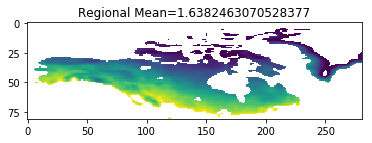

Current Time: 1.0


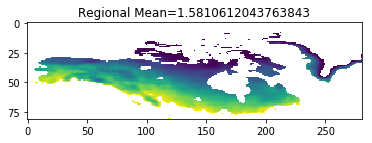

Current Time: 2.0


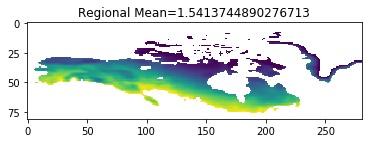

In [2]:
cfg_file = os.path.join(examples_directory, 'KuFlex_method.cfg')

%cat $cfg_file

x.initialize(cfg_file)

var_grd_id = x.get_var_grid('atmosphere_bottom_air__temperature')

print('grid_id=',var_grd_id)
print('grid_rank=',x.get_grid_rank(var_grd_id))
print('grid_size=',x.get_grid_size(var_grd_id))
print('grid_shape=',x.get_grid_shape(var_grd_id))
print('grid_spacing=',x.get_grid_spacing(var_grd_id))
print('grid_origin=',x.get_grid_origin(var_grd_id))

for i in np.arange(3):
    
    print ('Current Time:',x.get_current_time())
    
    x.update()
    ALT = x.get_value('soil__active_layer_thickness')
    plt.imshow(ALT)
    plt.title('Regional Mean='+np.str(np.nanmean(ALT)))
    plt.show()
    
x.finalize()


#### Try use update_until function

 
KuFlex model component: Initializing...
Initialized


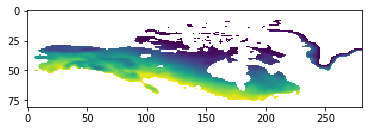

In [3]:
x.initialize(cfg_file)

x.update_until(2)
ALT = x.get_value('soil__active_layer_thickness')
plt.imshow(ALT)
plt.show()
x.finalize()

### Case 2 - use KuFlex_method_ts to try a time-series simulation
#### It uses time-series and scalar inputs.

#===============================================================================
# PermaModel Config File for: Ku_method
#===============================================================================
# Input
comp_status         | Enabled       | string    | component status {Enabled; Disabled}
permafrost_dir      | .             | string    | root permafrost code directory
in_directory        | .             | string    | input directory
out_directory       | .             | string    | output directory
site_prefix         | Barrow      	| string    | file prefix for the study site
case_prefix         | case_test     | string    | file prefix for the model scenario
start_year          | 2009          | long      | begining of the simulation time [year]
end_year            | 2017          | long      | begining of the simulation time [year]
dt                  | 1.0           | float     | timestep for permafrost process [year]
T_air_type        	| Time_Series     	| string    | allow

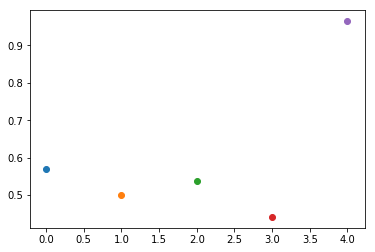

In [6]:
cfg_file = os.path.join(examples_directory, 'KuFlex_method_ts.cfg')

%cat $cfg_file

x.initialize(cfg_file)
for i in np.arange(5):
    t0 = x.get_current_time()
    x.update()
    ALT = x.get_value('soil__active_layer_thickness')
    print ('Current Time:',t0)
    plt.scatter(t0, ALT)
plt.show()
x.finalize()

### Case 3 - All scalar inputs.

#===============================================================================
# PermaModel Config File for: Ku_method
#===============================================================================
# Input
comp_status         | Enabled       | string    | component status {Enabled; Disabled}
permafrost_dir      | .             | string    | root permafrost code directory
in_directory        | .             | string    | input directory
out_directory       | .             | string    | output directory
site_prefix         | Barrow      	| string    | file prefix for the study site
case_prefix         | case_test     | string    | file prefix for the model scenario
start_year          | 2009          | long      | begining of the simulation time [year]
end_year            | 2009          | long      | begining of the simulation time [year]
dt                  | 1.0           | float     | timestep for permafrost process [year]
T_air_type        	| Scalar     	| string    | allowed in

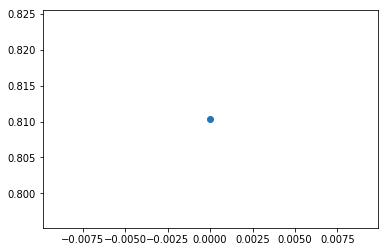

In [7]:
cfg_file = os.path.join(examples_directory, 'KuFlex_method_0d.cfg')

%cat $cfg_file

x.initialize(cfg_file)
print ('Current Time:',x.get_current_time())
t0 = x.get_current_time()
x.update()
ALT = x.get_value('soil__active_layer_thickness')
plt.scatter(t0, ALT)
plt.show()
x.finalize()